# Machine Learning Foundation

## Course 3, Part d: Decision Tree LAB


## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.


In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1

* Import the data and examine the features.
* We will be using all of them to predict `color` (white or red), but the colors feature will need to be integer encoded.


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Wine_Quality_Data.csv", sep=',')

In [4]:
data.shape

(6497, 13)

In [5]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Convert the color feature to an integer. This is a quick way to do it using Pandas.


In [7]:
data.color = data.color.apply(lambda x: 0 if x=='white' else 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


## Question 2

* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by wine quality. If possible, preserve the indices of the split for question 5 below.
* Check the percent composition of each quality level for both the train and test data sets.


In [9]:
list(data.columns[data.columns != 'color'])

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [10]:
[i for i in data.columns if i not in 'color']

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [11]:
feature_cols = list(data.columns[data.columns != 'color'])
feature_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into two parts with 1000 points in the test data
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)

# Get the index values from the generator
# Without next(), result will be only generator object
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['color']))

In [13]:
len(test_idx)

1000

In [14]:
# Separate datasets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']
X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

Now check the percent composition of each quality level in the train and test data sets. The data set is mostly white wine, as can be seen below.


In [15]:
y_train.value_counts(normalize=True).sort_index()

color
0    0.753866
1    0.246134
Name: proportion, dtype: float64

In [16]:
y_test.value_counts(normalize=True)

color
0    0.754
1    0.246
Name: proportion, dtype: float64

## Question 3

* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves.
* Determine how many nodes are present and what the depth of this (very large) tree is.
* Using this tree, measure the prediction error in the train and test data sets. What do you think is going on here based on the differences in prediction error?


In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

The number of nodes and the maximum actual depth.


In [18]:
dt.tree_.node_count, dt.tree_.max_depth

(171, 22)

**Feature Importances**

In [19]:
feat_names = dt.feature_names_in_
feat_names

array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [20]:
imp_feat = dt.feature_importances_
imp_feat

array([0.01676384, 0.04716284, 0.00328141, 0.01020607, 0.20813231,
       0.00493836, 0.66459334, 0.01767781, 0.01244247, 0.01090497,
       0.00307904, 0.00081754])

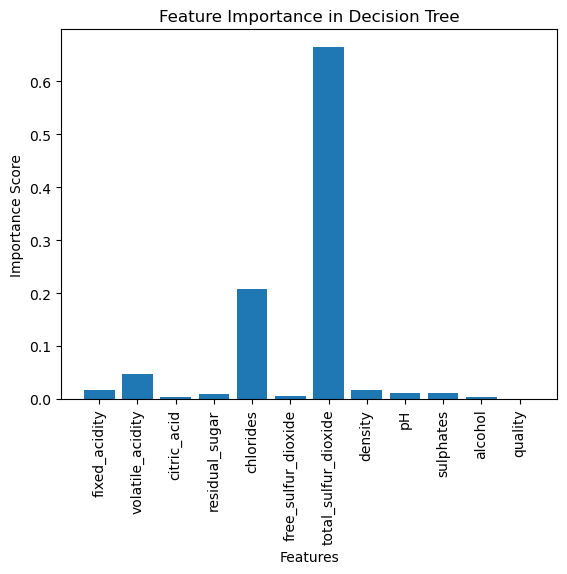

In [21]:
import matplotlib.pyplot as plt

plt.bar(feat_names, imp_feat)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Decision Tree")
plt.xticks(rotation=90)
plt.show()

As per visualization, the feature `total_sulfur_dioxide` is the most contributed to the model.

A function to return error metrics.


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(test, pred, label):
    return pd.Series({'accuracy': accuracy_score(test, pred), 
                      'precision': precision_score(test, pred),
                      'recall': recall_score(test, pred),
                      'f1': f1_score(test, pred)}, name=label)

The decision tree predicts a little better on the training data than the test data, which is consistent with (mild)  overfitting. Also notice the perfect recall score for the training data. In many instances, this prediction difference is even greater than that seen here. 


In [23]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [24]:
train = measure_error(y_train, y_train_pred, 'train')
train

accuracy     0.999818
precision    0.999261
recall       1.000000
f1           0.999631
Name: train, dtype: float64

In [25]:
test = measure_error(y_test, y_test_pred, 'test')
test

accuracy     0.984000
precision    0.963710
recall       0.971545
f1           0.967611
Name: test, dtype: float64

In [26]:
train_test_error = pd.concat([train, test], axis=1)   # became dataframe
train_test_error

,train,test
accuracy,0.999818,0.984000
precision,0.999261,0.963710
recall,1.000000,0.971545
f1,0.999631,0.967611


## Question 4

* Using grid search with cross validation, find a decision tree that performs well on the test data set. Use a different variable name for this decision tree model than in question 3 so that both can be used in question 6.
* Determine the number of nodes and the depth of this tree.
* Measure the errors on the training and test sets as before and compare them to those from the tree in question 3.


In [27]:
from sklearn.model_selection import GridSearchCV
depth_rng = range(1, dt.tree_.max_depth+1, 2)
feat_rng = range(1, len(dt.feature_importances_)+1)
depth_rng, feat_rng

(range(1, 23, 2), range(1, 13))

In [28]:
dtc = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': depth_rng, 'max_features': feat_rng}

gSearch = GridSearchCV(dtc, param_grid=param_grid, scoring='accuracy', n_jobs=-1)

gSearch.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 23, 2),
                         'max_features': range(1, 13)},
             scoring='accuracy')

The number of nodes and the maximum depth of the tree.


In [29]:
gSearch.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=9, random_state=42)

In [30]:
gSearch.best_estimator_.tree_.node_count, gSearch.best_estimator_.tree_.max_depth

(99, 7)

These test errors are a little better than the previous ones. So it would seem the previous example overfit the data, but only slightly so.


In [31]:
y_train_pred_gs = gSearch.predict(X_train)
y_test_pred_gs = gSearch.predict(X_test)

train_test_gs_error = pd.concat([measure_error(y_train, y_train_pred_gs, 'train'), 
                                 measure_error(y_test, y_test_pred_gs, 'test')], 
                                axis=1)
train_test_gs_error

,train,test
accuracy,0.995816,0.989000
precision,0.998501,0.983539
recall,0.984479,0.971545
f1,0.991440,0.977505


## Question 5

* Re-split the data into `X` and `y` parts, this time with `residual_sugar` being the predicted (`y`) data. *Note:* if the indices were preserved from the `StratifiedShuffleSplit` output in question 2, they can be used again to split the data.
* Using grid search with cross validation, find a decision tree **regression** model that performs well on the test data set.
* Measure the errors on the training and test sets using mean squared error.
* Make a plot of actual *vs* predicted residual sugar.


In [32]:
f_cols = [x for x in data.columns if x != 'residual_sugar']

# create data sets
X_train = data.loc[train_idx, f_cols]
y_train = data.loc[train_idx, 'residual_sugar']
X_test = data.loc[test_idx, f_cols]
y_test = data.loc[test_idx, 'residual_sugar']

In [33]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor().fit(X_train, y_train)

In [34]:
len(dr.feature_importances_), len(X_train.columns) # same with number of columns

(12, 12)

In [35]:
param_grid = {'max_depth': range(1, dr.tree_.max_depth+1, 2), 
              'max_features': range(1, len(dr.feature_importances_)+1)}

gSearch_sugar = GridSearchCV(DecisionTreeRegressor(random_state=42), 
                             param_grid=param_grid, 
                             scoring='neg_mean_squared_error', 
                             n_jobs=-1)

gSearch_sugar = gSearch_sugar.fit(X_train, y_train)

In [36]:
gSearch_sugar.best_estimator_

DecisionTreeRegressor(max_depth=29, max_features=12, random_state=42)

The number of nodes and the maximum depth of the tree. This tree has lots of nodes, which is not so surprising given the continuous data.


In [37]:
gSearch_sugar.best_estimator_.tree_.node_count, gSearch_sugar.best_estimator_.tree_.max_depth

(7957, 29)

The error on train and test data sets. Since this is continuous, we will use mean squared error.


In [38]:
from sklearn.metrics import mean_squared_error

y_train_pred_gr_sugar = gSearch_sugar.predict(X_train)
y_test_pred_gr_sugar = gSearch_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr_sugar), 
                                       'test': mean_squared_error(y_test, y_test_pred_gr_sugar)}, 
                                      name='MSE').to_frame().T
train_test_gr_sugar_error

,train,test
MSE,0.000099,2.798916


A plot of actual vs predicted residual sugar.


In [39]:
prediction = pd.DataFrame({'test': y_test.values, 
                           'predict': y_test_pred_gr_sugar}).set_index('test').sort_index()
prediction

,predict
test,
0.60,0.60
0.70,3.60
0.80,1.20
0.80,0.90
0.90,0.90
...,...
19.95,19.95
20.15,23.50
20.30,16.05


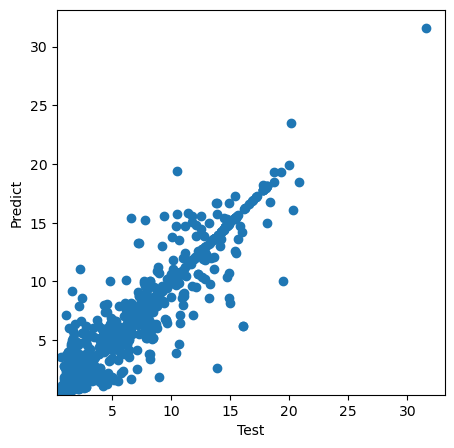

In [40]:
x = prediction.plot(marker='o', ls='', legend=False, figsize=(5,5))
x.set(xlabel='Test', ylabel='Predict', xlim=.35,ylim=.35)
plt.show()

## Question 6 

This question requires an additional command line program (GraphViz) and Python library (PyDotPlus). GraphViz can be installed with a package manager on Linux and Mac. For PyDotPlus, either `pip` or `conda` (`conda install -c conda-forge pydotplus`) can be used to install the library.

Once these programs are installed:

* Create a visualization of the decision tree from question 3, where wine color was predicted and the number of features and/or splits are not limited.
* Create a visualization of the decision tree from question 4, where wine color was predicted but a grid search was used to find the optimal depth and number of features.

The decision tree from question 5 will likely have too many nodes to visualize.


In [41]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

The tree from question 3.


In [42]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph

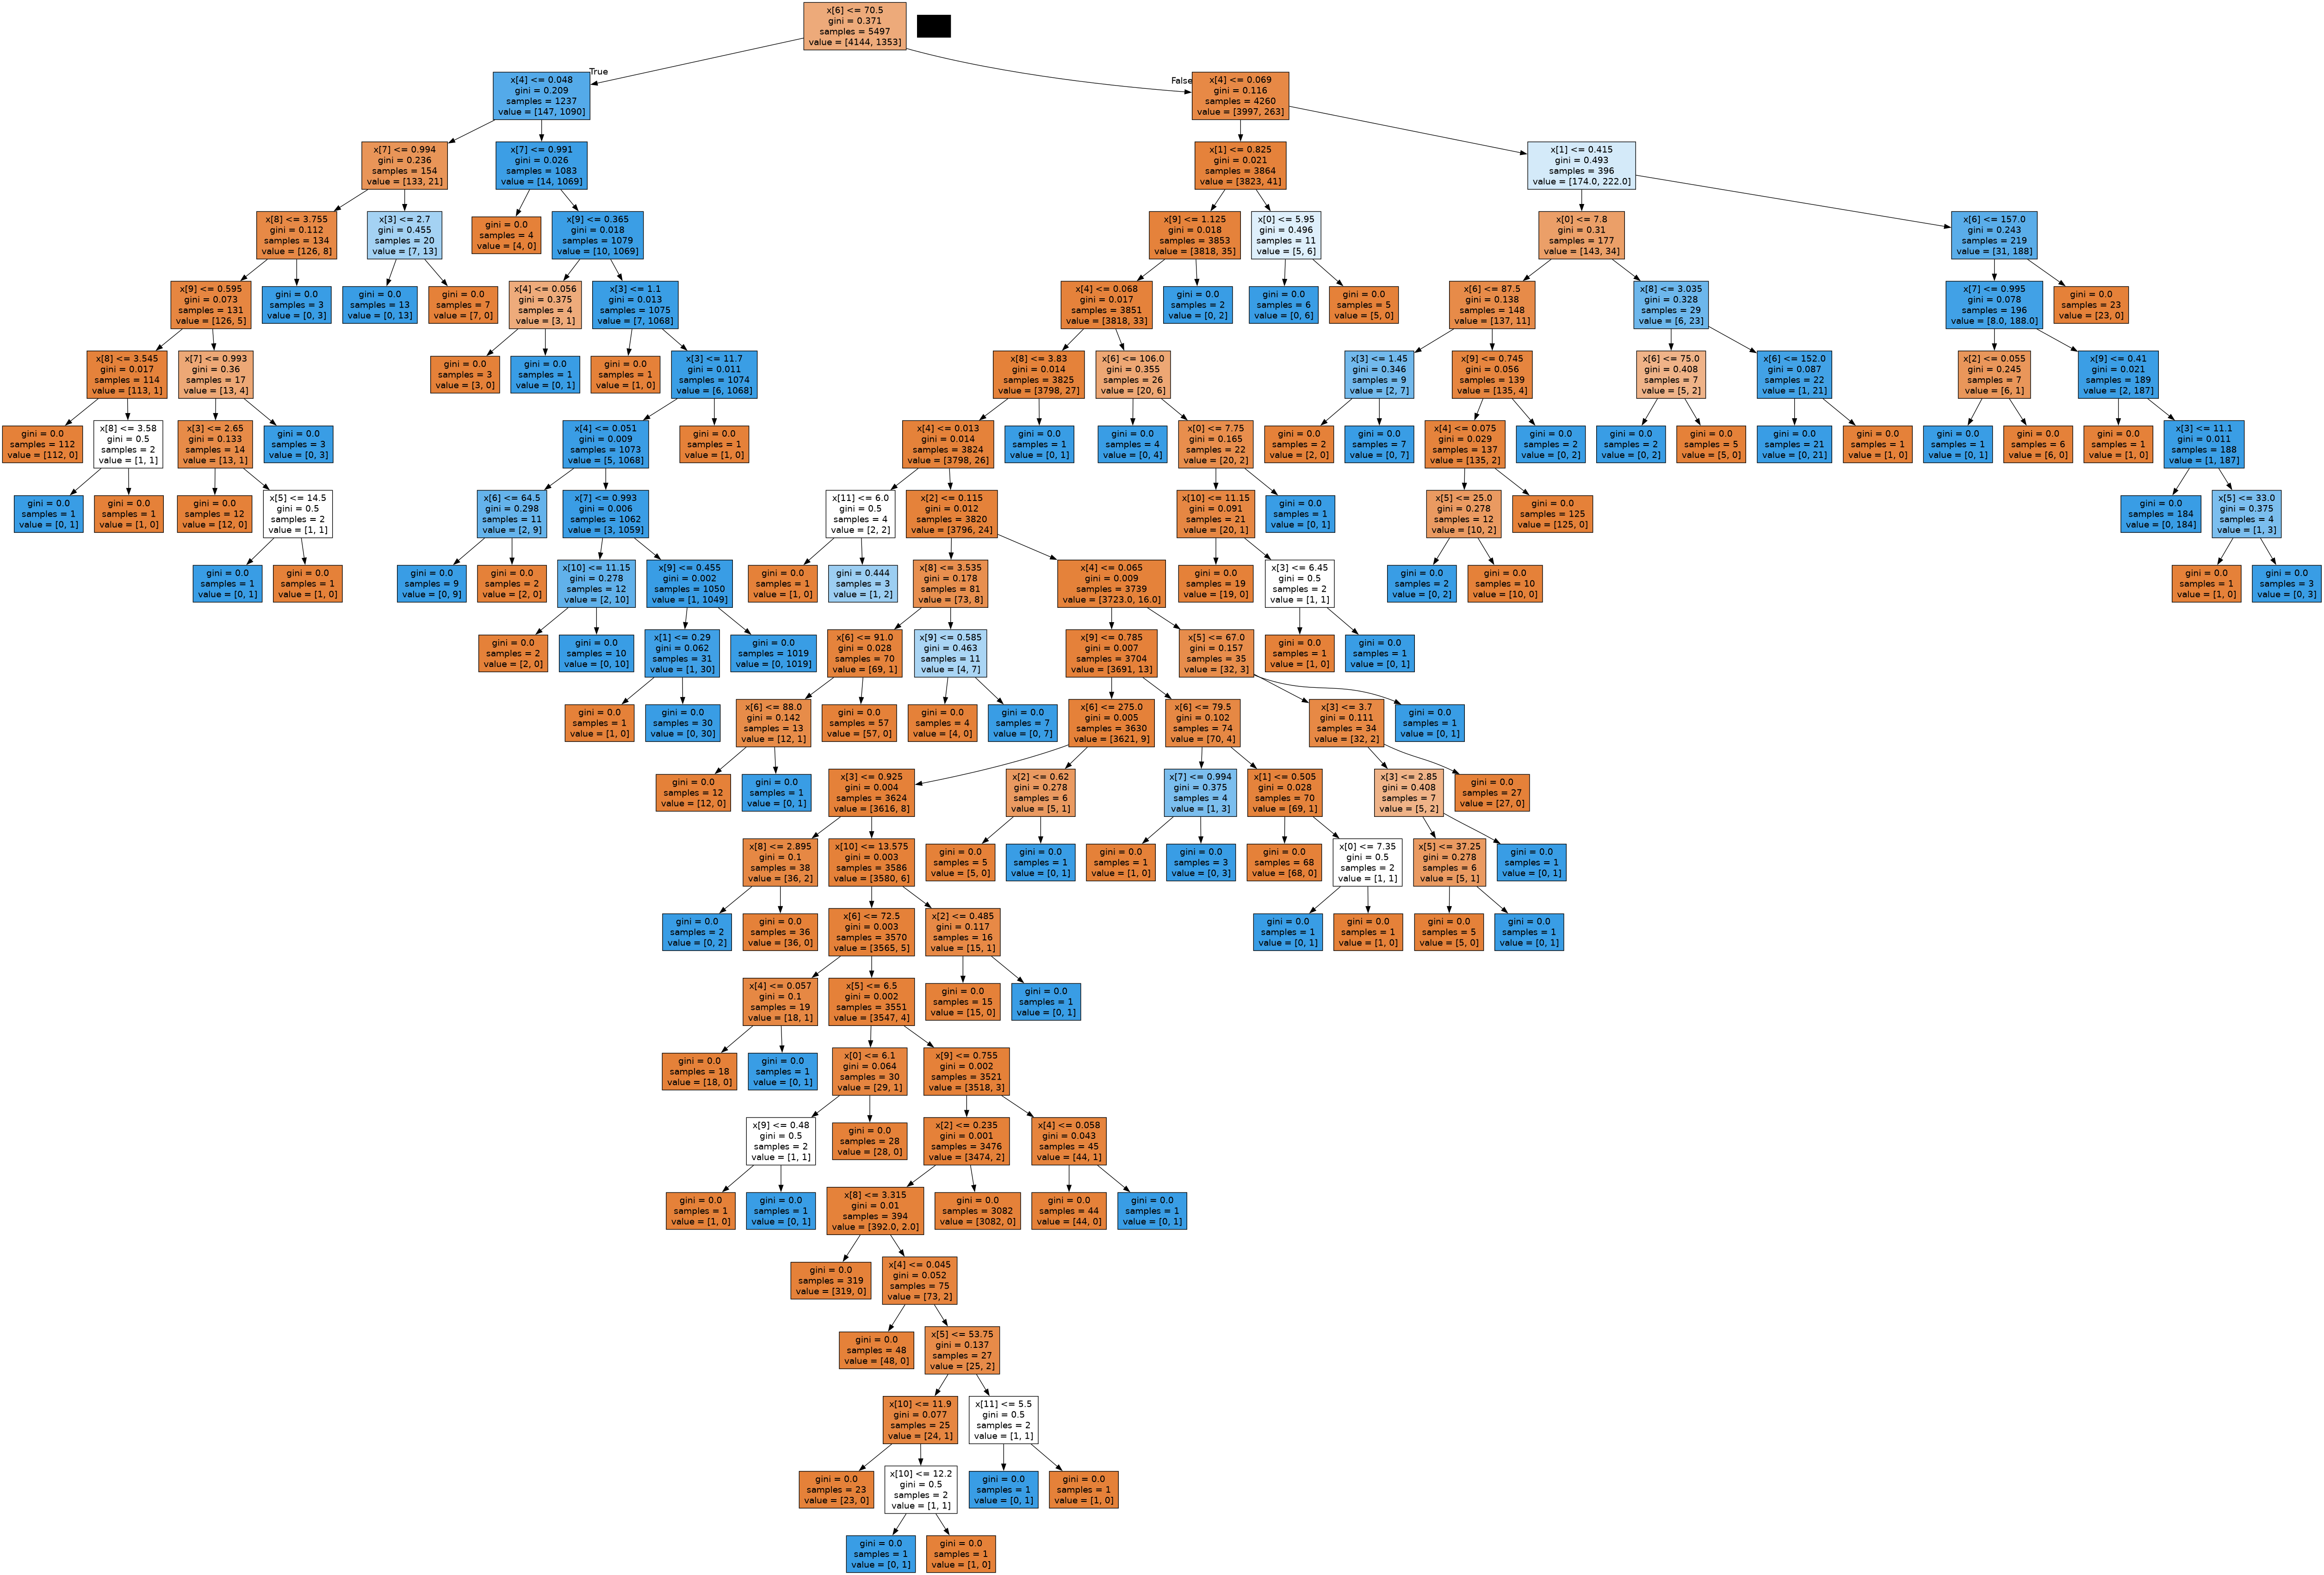

In [43]:
# View tree image
filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename=filename)

The tree fit with cross validation from question 4. This tree is much shallower than the previous one.


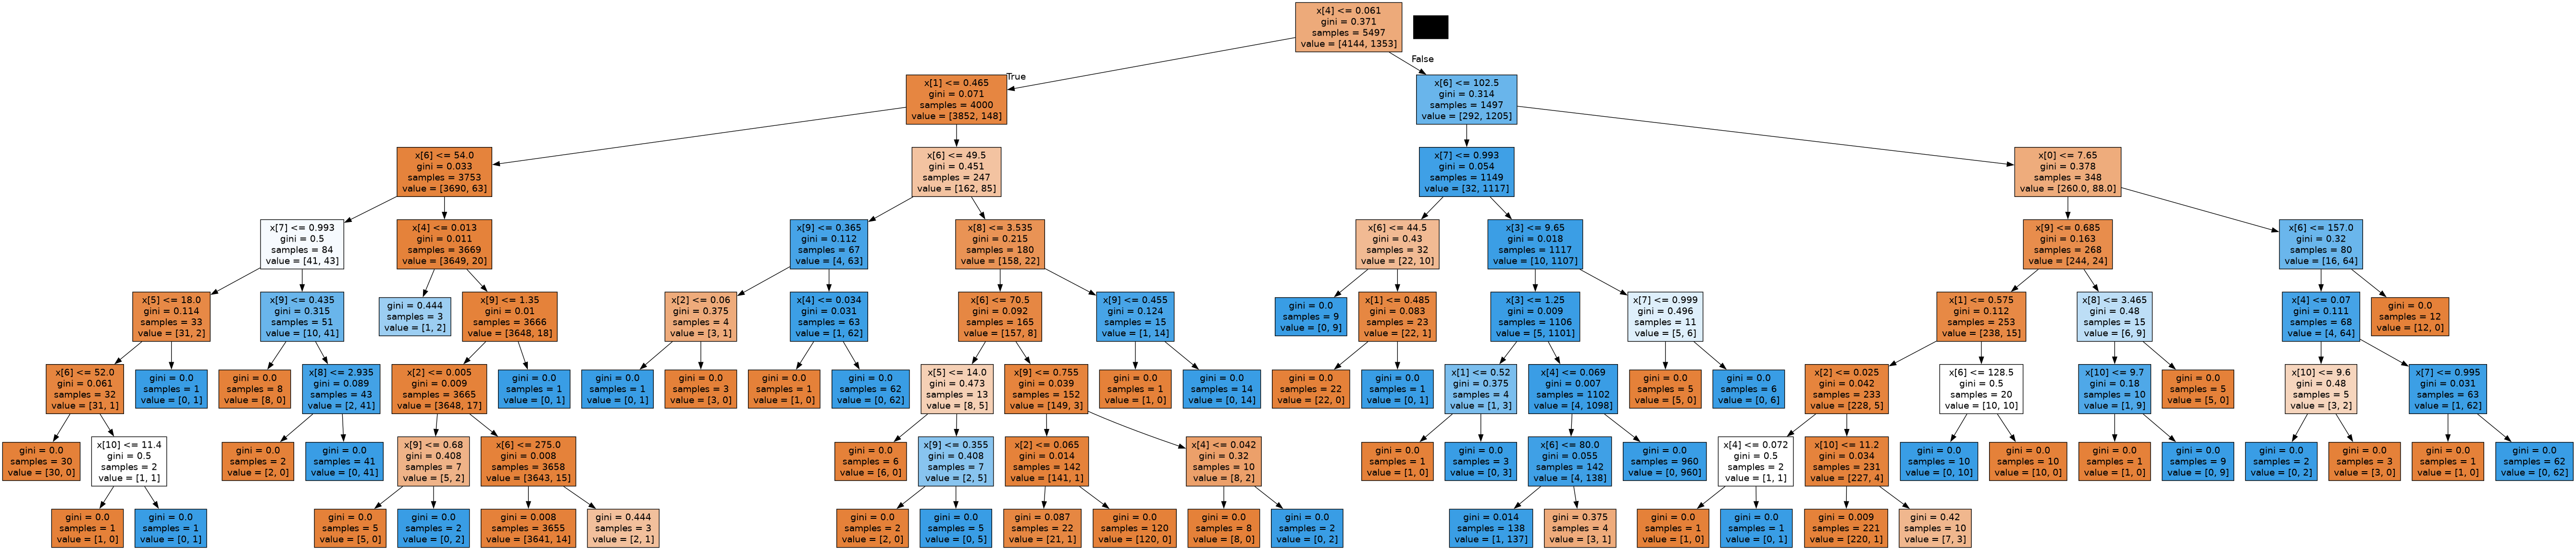

In [44]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(gSearch.best_estimator_, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'wine_tree_prune.png'
graph.write_png(filename)
Image(filename=filename) 
### END SOLUTION

---
### Machine Learning Foundation (C) 2020 IBM Corporation
